# Insurance Fraud Detection

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [168]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
from matplotlib import pyplot

In [170]:
from sklearn.model_selection import train_test_split, cross_val_score

In [171]:
from sklearn import preprocessing

In [172]:
import seaborn as sns

In [290]:
import warnings
warnings.filterwarnings("ignore")

In [268]:
trainData = pd.read_csv ("C:\\Users\\akorade1\\Documents\\CIS-508\\Insurance\\IF_TRAIN.csv")
trainData.head()

MONTH  WEEKOFMONTH  DAYOFWEEK     MAKE ACCIDENTAREA DAYOFWEEKCLAIMED  \
0   Jul            3     Sunday    Honda        Rural        Wednesday   
1   Nov            5     Monday    Mazda        Urban        Wednesday   
2   Jan            1     Monday  Pontiac        Urban        Wednesday   
3   Dec            1     Monday   Toyota        Rural          Tuesday   
4   Dec            5  Wednesday  Pontiac        Urban        Wednesday   

  MONTHCLAIMED  WEEKOFMONTHCLAIMED   SEX MARITALSTATUS  ...  \
0          Jan                   4  Male       Married  ...   
1          Dec                   1  Male        Single  ...   
2          Jan                   1  Male       Married  ...   
3          May                   3  Male       Married  ...   
4          Jan                   1  Male        Single  ...   

   AGEOFPOLICYHOLDER POLICEREPORTFILED WITNESSPRESENT AGENTTYPE  \
0           26_to_30                No             No  External   
1            over_65                No             No  External   
2           41_to_50                No             No  External   
3           36_to_40                No             No  External   
4           36_to_40                No             No  External   

  NUMBEROFSUPPLIMENTS  ADDRESSCHANGE_CLAIM  NUMBEROFCARS  YEAR  BASEPOLICY  \
0              3_to_5            no_change     1-vehicle  1994   Collision   
1                none            no_change     1-vehicle  1994  All_Perils   
2                none       under_6_months     1-vehicle  1994  All_Perils   
3         more_than_5       under_6_months    2-vehicles  1994  All_Perils   
4         more_than_5            no_change     1-vehicle  1994   Collision   

  FRAUDFOUND  
0        Yes  
1        Yes  
2        Yes  
3        Yes  
4        Yes  

[5 rows x 32 columns]

In [269]:
testData = pd.read_csv("C:\\Users\\akorade1\\Documents\\CIS-508\\Insurance\\IF_TEST.csv")

# EDA

In [251]:
TrainData.describe().transpose()

count         mean        std     min     25%     50%  \
WEEKOFMONTH         2999.0     2.781260   1.286055     1.0     2.0     3.0   
WEEKOFMONTHCLAIMED  2999.0     2.671224   1.261614     1.0     2.0     3.0   
AGE                 2999.0    40.055352  13.497026     0.0    31.0    38.0   
REPNUMBER           2999.0     8.511837   4.601437     1.0     4.0     9.0   
DEDUCTIBLE          2999.0   407.302434  41.847258   300.0   400.0   400.0   
DRIVERRATING        2999.0     2.496832   1.118365     1.0     1.0     2.0   
YEAR                2999.0  1995.114038   0.606007  1994.0  1995.0  1995.0   

                       75%     max  
WEEKOFMONTH            4.0     5.0  
WEEKOFMONTHCLAIMED     4.0     5.0  
AGE                   49.0    80.0  
REPNUMBER             12.0    16.0  
DEDUCTIBLE           400.0   700.0  
DRIVERRATING           3.0     4.0  
YEAR                1995.0  1996.0

In [176]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [177]:
TrainData.isna().sum()

MONTH                   0
WEEKOFMONTH             0
DAYOFWEEK               0
MAKE                    0
ACCIDENTAREA            0
DAYOFWEEKCLAIMED        0
MONTHCLAIMED            0
WEEKOFMONTHCLAIMED      0
SEX                     0
MARITALSTATUS           0
AGE                     0
FAULT                   0
POLICYTYPE              0
VEHICLECATEGORY         0
VEHICLEPRICE            0
REPNUMBER               0
DEDUCTIBLE              0
DRIVERRATING            0
DAYS_POLICY_ACCIDENT    0
DAYS_POLICY_CLAIM       0
PASTNUMBEROFCLAIMS      0
AGEOFVEHICLE            0
AGEOFPOLICYHOLDER       0
POLICEREPORTFILED       0
WITNESSPRESENT          0
AGENTTYPE               0
NUMBEROFSUPPLIMENTS     0
ADDRESSCHANGE_CLAIM     0
NUMBEROFCARS            0
YEAR                    0
BASEPOLICY              0
FRAUDFOUND              0
dtype: int64

In [ ]:
# there are no null values in the dataset

# checking the outliers in Dataset

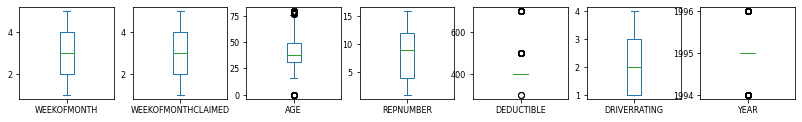

In [178]:
TrainData.plot(kind='box', subplots=True, layout=(10,10), fontsize=8, figsize=(20,20))
pyplot.show()

# correlation

<AxesSubplot:>

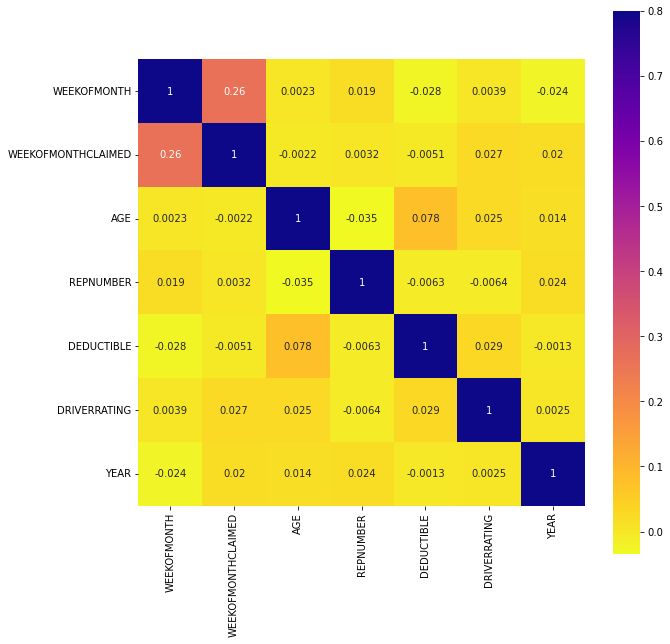

In [179]:
corrmat = TrainData.corr(method='pearson')
f, ax = pyplot.subplots(figsize = (10,10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True,cmap='plasma_r')

In [ ]:
# none of the variables are highly correlated 


# Gender and Fraud Variable

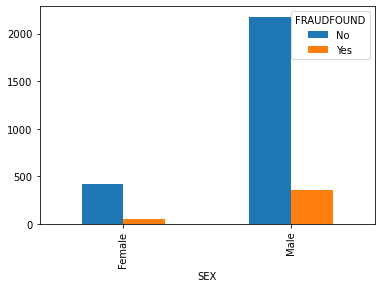

In [180]:
pd.crosstab(TrainData.SEX, TrainData.FRAUDFOUND).plot(kind='bar');

# Fraud vs Non Fraud

In [181]:
TrainData.FRAUDFOUND.value_counts()

No     2600
Yes     399
Name: FRAUDFOUND, dtype: int64

<AxesSubplot:ylabel='FRAUDFOUND'>

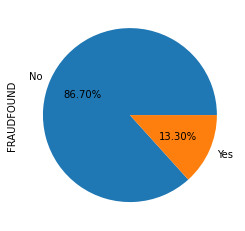

In [182]:
TrainData.FRAUDFOUND.value_counts().plot.pie(autopct='%1.2f%%')

In [14]:
#there are 86.7% fraudulent transactions and 13.30% non fraudulent transactions

In [ ]:
# Working with categorical columns in the dataset

In [183]:
TrainData.columns

Index(['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA',
       'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX',
       'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY',
       'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING',
       'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS',
       'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED',
       'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS',
       'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY',
       'FRAUDFOUND'],
      dtype='object')

In [184]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [270]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']
['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'F

In [271]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['FRAUDFOUND']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData[TestCols[0:len(TestCols)-1]].copy()
Ytest = testData[['FRAUDFOUND']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

Train Set shape:
(2999, 31)
(2999, 1)
Test Set shape:
(12918, 31)
(12918, 1)


In [272]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

# Catogorical Variables

In [273]:
#List of Categorical Features
categoricalFeatures = ['MONTH','DAYOFWEEK','MAKE','ACCIDENTAREA','DAYOFWEEKCLAIMED','MONTHCLAIMED','SEX','MARITALSTATUS',
                       'FAULT','POLICYTYPE','VEHICLECATEGORY','VEHICLEPRICE','DAYS_POLICY_ACCIDENT','DAYS_POLICY_CLAIM',
                       'PASTNUMBEROFCLAIMS','AGEOFVEHICLE','AGEOFPOLICYHOLDER','POLICEREPORTFILED','WITNESSPRESENT','AGENTTYPE',
                       'NUMBEROFSUPPLIMENTS','ADDRESSCHANGE_CLAIM','NUMBEROFCARS','BASEPOLICY']

In [279]:
from sklearn.preprocessing import OneHotEncoder

In [280]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categoricalFeatures]),columns=ohe.get_feature_names(),index=Xtrain.index)
Xtrain = pd.concat([Xtrain,Xcat],axis=1)
Xtrain.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtrain.sample(5)

C:\Users\akorade1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


WEEKOFMONTH  WEEKOFMONTHCLAIMED  AGE  REPNUMBER  DEDUCTIBLE  \
1792            2                   2   37          1         400   
2819            2                   3   38          2         400   
1037            2                   2   33         13         400   
54              3                   1   55          3         400   
1094            4                   4   52          1         400   

      DRIVERRATING  YEAR  x0_Apr  x0_Aug  x0_Dec  ...  x21_4_to_8_years  \
1792             2  1995     1.0     0.0     0.0  ...               0.0   
2819             2  1995     0.0     0.0     0.0  ...               0.0   
1037             4  1995     0.0     0.0     0.0  ...               0.0   
54               2  1994     0.0     0.0     0.0  ...               0.0   
1094             2  1994     0.0     0.0     0.0  ...               0.0   

      x21_no_change  x21_under_6_months  x22_1-vehicle  x22_2-vehicles  \
1792            1.0                 0.0            1.0             0.0   
2819            1.0                 0.0            1.0             0.0   
1037            1.0                 0.0            1.0             0.0   
54              1.0                 0.0            1.0             0.0   
1094            1.0                 0.0            1.0             0.0   

      x22_3_to_4  x22_5_to_8  x23_All_Perils  x23_Collision  x23_Liability  
1792         0.0         0.0             1.0            0.0            0.0  
2819         0.0         0.0             1.0            0.0            0.0  
1037         0.0         0.0             1.0            0.0            0.0  
54           0.0         0.0             1.0            0.0            0.0  
1094         0.0         0.0             0.0            0.0            1.0  

[5 rows x 139 columns]

In [283]:
# OneHotEncoding on Test (only transform)
# OneHotEncoding is to be done on Categorical variables.
Xcat = pd.DataFrame(ohe.transform(Xtest[categoricalFeatures]),columns=ohe.get_feature_names(),index=Xtest.index)
Xtest = pd.concat([Xtest,Xcat],axis=1)
Xtest.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtest.sample(5)

C:\Users\akorade1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


WEEKOFMONTH  WEEKOFMONTHCLAIMED  AGE  REPNUMBER  DEDUCTIBLE  \
5660             3                   3   35          7         400   
7314             3                   3   54         13         400   
3110             3                   4   30          5         400   
10873            4                   4   63         12         400   
7727             3                   4   26         14         400   

       DRIVERRATING  YEAR  x0_Apr  x0_Aug  x0_Dec  ...  x21_4_to_8_years  \
5660              3  1996     0.0     0.0     0.0  ...               0.0   
7314              3  1995     0.0     0.0     0.0  ...               0.0   
3110              2  1996     0.0     0.0     0.0  ...               0.0   
10873             1  1995     0.0     0.0     0.0  ...               0.0   
7727              4  1994     0.0     0.0     0.0  ...               0.0   

       x21_no_change  x21_under_6_months  x22_1-vehicle  x22_2-vehicles  \
5660             1.0                 0.0            1.0             0.0   
7314             1.0                 0.0            1.0             0.0   
3110             1.0                 0.0            1.0             0.0   
10873            1.0                 0.0            1.0             0.0   
7727             1.0                 0.0            1.0             0.0   

       x22_3_to_4  x22_5_to_8  x23_All_Perils  x23_Collision  x23_Liability  
5660          0.0         0.0             0.0            0.0            1.0  
7314          0.0         0.0             0.0            1.0            0.0  
3110          0.0         0.0             0.0            0.0            1.0  
10873         0.0         0.0             0.0            0.0            1.0  
7727          0.0         0.0             0.0            0.0            1.0  

[5 rows x 139 columns]

# Decision Tree with default parameters

In [284]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [285]:
X_Pred = dt.predict(Xtest)
XPred = dt.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8843474222015791
Confusion Matrix for Decision Tree:
[[10980  1440]
 [   54   444]]
Max Depth 24
Leaf 288
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       1.00      0.88      0.94     12420
         Yes       0.24      0.89      0.37       498

    accuracy                           0.88     12918
   macro avg       0.62      0.89      0.65     12918
weighted avg       0.97      0.88      0.91     12918



# Decision tree classifier - Random Search CV

In [286]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={'min_samples_leaf' : range(10,300,10),'max_depth': 
            range(5,30,2),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 50, 'max_depth': 25, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.884115
--- 3.4966750144958496 seconds ---


# Decision Tree - Grid Search CV

In [287]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.897430
--- 91.87479496002197 seconds ---


In [288]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [289]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8841151881096145
Confusion Matrix for Decision Tree:
[[11255  1165]
 [  332   166]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.91      0.94     12420
         Yes       0.12      0.33      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.91     12918

[0.74615385 0.73990385 0.54375    0.5        0.57594937]


In [291]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8974299427155906
Confusion Matrix for Decision Tree:
[[11427   993]
 [  332   166]]
              precision    recall  f1-score   support

          No       0.97      0.91      0.94     12420
         Yes       0.12      0.33      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.91     12918

[0.74615385 0.69807692 0.54182692 0.5        0.56962025]


# Random Forest Classifier with default parameters

In [292]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [293]:
X_Pred1 = rf.predict(Xtest)
XPred1 = rf.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred1))

Train Accuracy: 1.0
Test Accuracy: 0.9672549930329772
Confusion Matrix for Decision Tree:
[[12076   344]
 [   79   419]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.99      0.97      0.98     12420
         Yes       0.55      0.84      0.66       498

    accuracy                           0.97     12918
   macro avg       0.77      0.91      0.82     12918
weighted avg       0.98      0.97      0.97     12918



# Random Forest - Random Search CV

In [294]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 30, 'min_samples_leaf': 50, 'max_features': 30, 'max_depth': 7}
accuracy Score for Decision Tree:0.938535
--- 10.981621503829956 seconds ---


# Random Forest - Grid Search CV

In [295]:
import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters)
rf_grid.fit(Xtrain, Ytrain)
grid_parm1=rf_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'max_depth': 9, 'max_features': 30, 'min_samples_leaf': 30, 'n_estimators': 30}
accuracy Score for Decision Tree:0.929943
--- 185.23943948745728 seconds ---


In [296]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rfRand = RandomForestClassifier(**grid_parm)
rfGrid = RandomForestClassifier(**grid_parm1)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [297]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9338132837900603
Confusion Matrix for Decision Tree:
[[11951   469]
 [  386   112]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.96      0.97     12420
         Yes       0.19      0.22      0.21       498

    accuracy                           0.93     12918
   macro avg       0.58      0.59      0.59     12918
weighted avg       0.94      0.93      0.94     12918

[0.5125     0.71298077 0.54375    0.5        0.55696203]


In [298]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.9292460133147546
Confusion Matrix for Decision Tree:
[[11885   535]
 [  379   119]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.96      0.96     12420
         Yes       0.18      0.24      0.21       498

    accuracy                           0.93     12918
   macro avg       0.58      0.60      0.58     12918
weighted avg       0.94      0.93      0.93     12918



# Random Forest with default parameters is the best performing model

In [ ]:
Voice thread link - https://asucarey.voicethread.com/share/20923993/